## 决策树：

### 1. 决策树介绍：

> 根节点：特征内部节点：特征叶子节点：分类

<img src="image_github/decision_tree.png" width="400" height="400">

**如何选择树结构？依据奥卡姆剃刀，选择更简单的结构 shallower trees**。例如，下图中，右边树结构更好。

<img src="image_github/decision_tree_example.png" width="400" height="400">

### 2. 熵：

> 信息理论：当数据量一致时，**系统越有序，熵值越低**；**系统越混乱或者分散，熵值越高**。简单来说，熵用于表示不确定性。熵越大代表概率越小，在机器学习中，熵越大即这个类别的不确定性更大，反之越小。

<img src="image_github/poker.png" width="500" height="500">
$$
\text{H}(t) = - \sum_{i=1}^l\left(\text{P}(t=i) \log\text{P}(t=i)\right)
$$

### 3. 信息增益：

> 信息增益在决策树算法中是用来选择特征的指标，**信息增益越大，则这个特征的选择性越好。**

例如，垃圾邮件分类，数据集如下：
<img src="image_github/spam.png" width="500" height="500">

第一步，根据目标分类计算数据集的熵。

$$
\text{H}(t, D) = - \sum_{l \in {\text{spam}, \text{ham}}} \text{P}(t=l) \log\text{P}(t=l) = - \left(\text{P}(t=\text{spam}) \log\text{P}(t=\text{spam}) + \text{P}(t=\text{ham}) \log\text{P}(t=\text{ham}) \right) = -(0.5 \times log_2^{0.5} + 0.5 \times log_2^{0.5}) = 1
$$

第二步，计算每个特征的reminder，公式如下：
$$
rem(d, D) = \sum_{l \in levels(d)} \frac{|D_{d=l}|}{|D|} \times H(t, D_{d=l})
$$

* 计算第一个特征：

$$
rem(words, D) = \left(\frac{\left|D_{words=T}\right|}{\left|D\right|} \times H(t,D_{words=T}) + \frac{\left|D_{words=F}\right|}{\left|D\right|} \times H(t, D_{words=F}) \right)
$$

$$
 = 0.5 \times \left(- \sum_{l \in {spam, ham}} \text{P}(t=l) \log\text{P}(t=l) \right) + 0.5 \times \left(- \sum_{l \in {spam, ham}} \text{P}(t=l) \log\text{P}(t=l) \right)
$$

$$
 = \left(0.5 \times \left(-\left(\frac{3}{3} \times log_2{\frac{3}{3}} + \frac{0}{3} \times log_2{\frac{0}{3}} \right)\right) \right) + \left(0.5 \times \left(-\left(\frac{0}{3} \times log_2{\frac{0}{3}} + \frac{3}{3} \times log_2{\frac{3}{3}} \right)\right) \right) = 0  bit
$$

* 同理，计算其余的特征。

$$
rem(sender, D) = 0.9183 bit, rem(images, D) = 1 bit
$$

第三步，计算信息增益IG，公式如下：
$$
\text{IG}(d, D) = \text{H}(t, D) - \text{rem}(d, D)
$$

$$
\text{IG}(\text{suspicious words}, D) = 1 - 0 = 1 bit
$$

$$
\text{IG}(\text{unknown sender}, D) = 1 − 0.9183 = 0.0817 bits
$$

$$
\text{IG}(\text{contain images}, D) = 1 − 1 = 0 bits
$$


### 4. ID3算法 Iterative Dichotomizer 3：

> 创建最浅的树结构。ID3算法的核心是在决策树各个节点上应用信息增益准则来选择特征，递归的构建决策树。

> 具体方法是：从根节点开始，对节点计算所有可能的特征的信息增益，选择信息增益最大的特征作为节点的特征，**由该特征的不同取值建立子节点**：再对子节点递归的调用以上方法，构建决策树：直到所有的特征信息增益均很小或没有特征可以选择为止。

### 5. 处理连续的特征值：

> 定义threshold（例如：term2_week4的RFM分析）。然后，根据信息增益进行选择。

例如下图所示，将ELEVATION特征进行处理。
<img src="image_github/threshold.png" width="500" height="500">

首先，将elevation进行排序。
<img src="image_github/decision_tree_sort.png" width="500" height="500">

然后，设置不同的门槛。
<img src="image_github/decision_tree_IG.png" width="500" height="500">

first split

<img src="image_github/first_split.png" width="500" height="500">

second split

<img src="image_github/second_split.png" width="400" height="400">

### 6. Sklearn：

In [1]:
import os
import subprocess
def module(*args):        
    if isinstance(args[0], list):        
        args = args[0]        
    else:        
        args = list(args)        
    (output, error) = subprocess.Popen(['/usr/bin/modulecmd', 'python'] + args, stdout=subprocess.PIPE).communicate()
    exec(output)    
module('load', 'apps/java/jdk1.8.0_102/binary')    
os.environ['PYSPARK_PYTHON'] = os.environ['HOME'] + '/.conda/envs/jupyter-spark/bin/python'

In [2]:
import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master("local[2]") \
    .appName("COM6012 DT") \
    .getOrCreate()

sc = spark.sparkContext

In [2]:
import pandas as pd
import numpy as np
spam_data = pd.read_csv('Data/spambase.data')
spam_names = [spam_names.rstrip('\n') for spam_names in open('Data/spambase.data.names')]
number_names = np.shape(spam_names)[0]
for i in range(number_names):
    local = spam_names[i]
    colon_pos = local.find(':')
    spam_names[i] = local[:colon_pos]
spam_data.columns = spam_names
X = spam_data.iloc[:, 0:57]
y = spam_data.iloc[:, 57]

In [3]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf = clf.fit(X, y)

In [4]:
clf

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### 展示决策树 graphviz：

In [7]:
import graphviz # this cannot be installed on HPC.
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("spam")

'spam.pdf'

In [8]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=spam_names[0:57],  
                      class_names=spam_names[57],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  

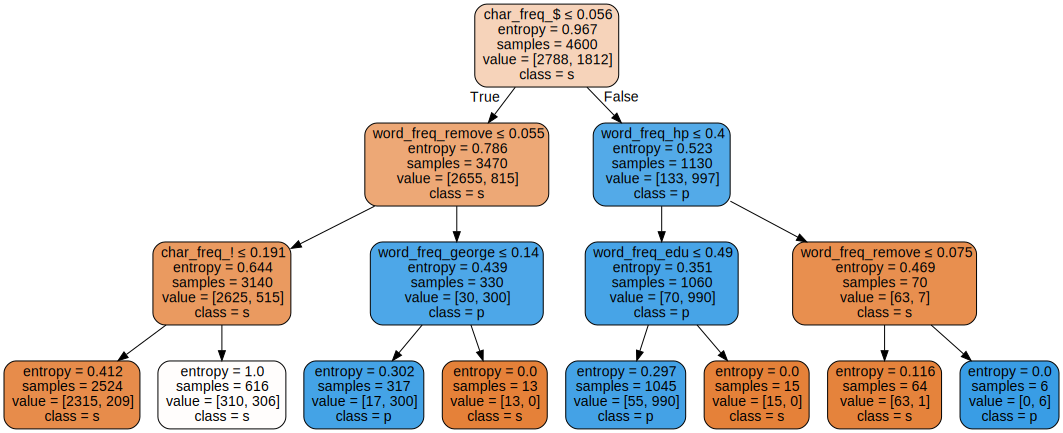

In [9]:
graph # see spam.pdf 

In [10]:
# We first split the data into a train and a test set. 
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
indexes = list(ss.split(X, y))
train_set  = indexes[0][0]
test_set  = indexes[0][1]
Xtrain = X.iloc[train_set, :]
ytrain = y.iloc[train_set]
Xtest = X.iloc[test_set, :]
ytest = y.iloc[test_set]

In [11]:
from sklearn.model_selection import GridSearchCV # For model selection
criterion_opts = np.array(['entropy', 'gini'])
max_depth_opts = [3, 5, 10, 15]
param_grid = dict(criterion = criterion_opts, max_depth = max_depth_opts)
cv = ShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
grid = GridSearchCV(tree.DecisionTreeClassifier(), param_grid=param_grid, cv=cv, scoring='accuracy')
grid.fit(Xtrain, ytrain)

GridSearchCV(cv=ShuffleSplit(n_splits=1, random_state=42, test_size=0.3, train_size=None),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': array(['entro

In [13]:
grid.best_params_ # best parameters.

{'criterion': 'gini', 'max_depth': 10}

In [14]:
clf = tree.DecisionTreeClassifier(criterion=grid.best_params_["criterion"],max_depth=grid.best_params_["max_depth"])
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)  

In [15]:
from sklearn.metrics import accuracy_score # Accuracy score
accuracy = accuracy_score(ytest, ypred)
print(accuracy) 

0.9028985507246376


### unbalanced dataset：
> **1. 使用 sklearn 下的 StratifiedShuffleSplit。**

> **2. 使用 recall，F1作为度量。**

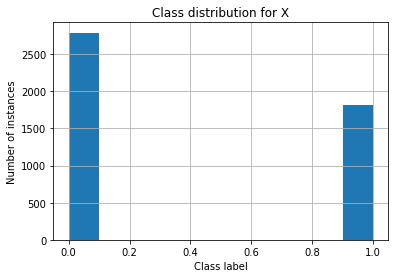

In [16]:
%matplotlib inline 
import matplotlib.pyplot as plt
y.hist()
plt.ylabel('Number of instances')
plt.xlabel('Class label')
plt.title('Class distribution for X')
plt.show()

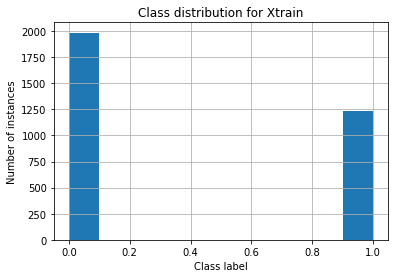

In [17]:
ytrain.hist()
plt.ylabel('Number of instances')
plt.xlabel('Class label')
plt.title('Class distribution for Xtrain')
plt.show()

### 7. Spark：

In [20]:
rawdata = spark.read.csv('../Data/spambase.data')
rawdata.cache()
ncolumns = len(rawdata.columns)
spam_names = [spam_names.rstrip('\n') for spam_names in open('../Data/spambase.data.names')]
number_names = np.shape(spam_names)[0]
for i in range(number_names):
    local = spam_names[i]
    colon_pos = local.find(':')
    spam_names[i] = local[:colon_pos]

In [21]:
schemaNames = rawdata.schema.names
spam_names[ncolumns-1] = 'labels'
for i in range(ncolumns):
    rawdata = rawdata.withColumnRenamed(schemaNames[i], spam_names[i])

In [23]:
from pyspark.sql.types import DoubleType
for i in range(ncolumns):
    rawdata = rawdata.withColumn(spam_names[i], rawdata[spam_names[i]].cast(DoubleType()))

In [24]:
rawdata.printSchema()

root
 |-- word_freq_make: double (nullable = true)
 |-- word_freq_address: double (nullable = true)
 |-- word_freq_all: double (nullable = true)
 |-- word_freq_3d: double (nullable = true)
 |-- word_freq_our: double (nullable = true)
 |-- word_freq_over: double (nullable = true)
 |-- word_freq_remove: double (nullable = true)
 |-- word_freq_internet: double (nullable = true)
 |-- word_freq_order: double (nullable = true)
 |-- word_freq_mail: double (nullable = true)
 |-- word_freq_receive: double (nullable = true)
 |-- word_freq_will: double (nullable = true)
 |-- word_freq_people: double (nullable = true)
 |-- word_freq_report: double (nullable = true)
 |-- word_freq_addresses: double (nullable = true)
 |-- word_freq_free: double (nullable = true)
 |-- word_freq_business: double (nullable = true)
 |-- word_freq_email: double (nullable = true)
 |-- word_freq_you: double (nullable = true)
 |-- word_freq_credit: double (nullable = true)
 |-- word_freq_your: double (nullable = true)
 |-- 

In [25]:
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols = spam_names[0:ncolumns-1], outputCol = 'features') 
raw_plus_vector = assembler.transform(rawdata)

In [31]:
data = raw_plus_vector.select('features','labels')
data.printSchema()

root
 |-- features: vector (nullable = true)
 |-- labels: double (nullable = true)



In [32]:
data.show(5)

+--------------------+------+
|            features|labels|
+--------------------+------+
|(57,[1,2,4,11,15,...|   1.0|
|(57,[0,1,2,4,5,6,...|   1.0|
|(57,[0,2,4,5,6,7,...|   1.0|
|(57,[4,6,7,8,9,10...|   1.0|
|(57,[4,6,7,8,9,10...|   1.0|
+--------------------+------+
only showing top 5 rows



In [33]:
(trainingData, testData) = data.randomSplit([0.7, 0.3], 42)

In [34]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(labelCol="labels", featuresCol="features", maxDepth=10, impurity='entropy')
model = dt.fit(trainingData)
predictions = model.transform(testData)

> **maxDepth**: it corresponds to the maximum depth of the tree. The default is 5.<p>
> **maxBins**: it determines how many bins should be created from continuous features. The default is 32.<p>
> **impurity**: it is the metric used to compute information gain. The options are "gini" or "entropy". The default is "gini".<p>
> **minInfoGain**: it determines the minimum information gain that will be used for a split. The default is zero.

In [35]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(labelCol="labels", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy = %g " % accuracy)

Accuracy = 0.92371 


In [36]:
fi = model.featureImportances # show the importance of those features.

In [37]:
imp_feat = np.zeros(ncolumns-1)
imp_feat[fi.indices] = fi.values

<BarContainer object of 57 artists>

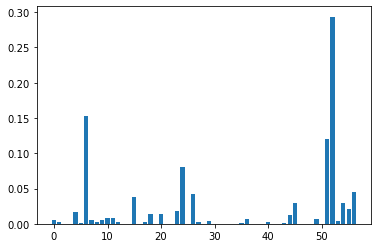

In [39]:
%matplotlib inline 
import matplotlib.pyplot as plt
x = np.arange(ncolumns-1)
plt.bar(x, imp_feat)

In [40]:
spam_names[np.argmax(imp_feat)] # The feature with the highest importance

'char_freq_$'

In [41]:
print(model.toDebugString)

DecisionTreeClassificationModel (uid=DecisionTreeClassifier_442483a4b222eeb7759b) of depth 10 with 201 nodes
  If (feature 52 <= 0.0525)
   If (feature 6 <= 0.055)
    If (feature 51 <= 0.3805)
     If (feature 26 <= 0.005)
      If (feature 15 <= 0.025)
       If (feature 23 <= 0.01)
        If (feature 24 <= 0.01)
         If (feature 56 <= 28.5)
          If (feature 7 <= 0.005)
           If (feature 17 <= 0.005)
            Predict: 0.0
           Else (feature 17 > 0.005)
            Predict: 0.0
          Else (feature 7 > 0.005)
           If (feature 20 <= 0.01)
            Predict: 0.0
           Else (feature 20 > 0.01)
            Predict: 1.0
         Else (feature 56 > 28.5)
          If (feature 4 <= 1.835)
           If (feature 36 <= 0.125)
            Predict: 0.0
           Else (feature 36 > 0.125)
            Predict: 0.0
          Else (feature 4 > 1.835)
           If (feature 35 <= 0.005)
            Predict: 1.0
           Else (feature 35 > 0.005)
            